In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [20]:
df =  pd.read_csv("fish_data.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [22]:
# Menghitung nilai data yang kosong
df.isna().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [23]:
df.describe()

,length,weight,w_l_ratio
count,4080.00000,4080.000000,4080.000000
mean,16.69040,3.455341,0.242659
std,6.71153,0.715064,0.115420
min,6.41000,2.070000,0.100000
25%,11.44000,3.000000,0.150000
50%,16.48000,3.200000,0.190000
75%,19.68000,3.890000,0.320000
max,33.89000,4.790000,0.610000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [25]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 4080
Jumlah kolom: 4


In [26]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,8.57,2.93,0.34
1,Anabas testudineus,6.69,3.05,0.46
2,Anabas testudineus,8.35,3.08,0.37
3,Anabas testudineus,8.84,3.20,0.36
4,Anabas testudineus,7.82,3.07,0.39


In [27]:
#cek null
df.isna().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [28]:
#cek duplikat
df.duplicated().sum()

77

In [29]:
numerik = df.select_dtypes(exclude="object")
kategorikal = df.select_dtypes(include="object")

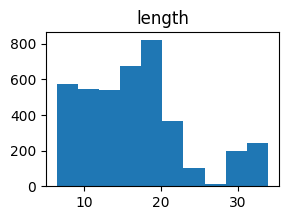

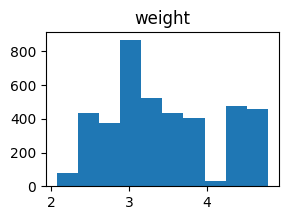

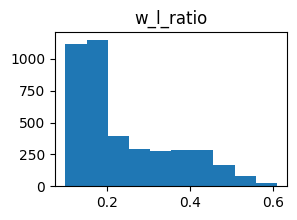

In [30]:
# Melihat Persebaran Data - Histogram
for column in numerik.columns:
        plt.figure(figsize=(3,2))
        plt.hist(df[column])
        plt.title(column)
        plt.show()

In [31]:
# Remove Duplicated
df_cleaned = df.drop_duplicates()

In [32]:
df_cleaned.duplicated().sum()

0

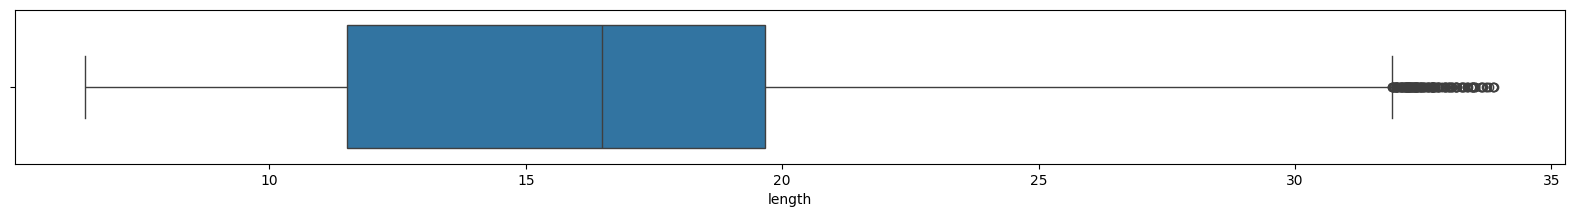

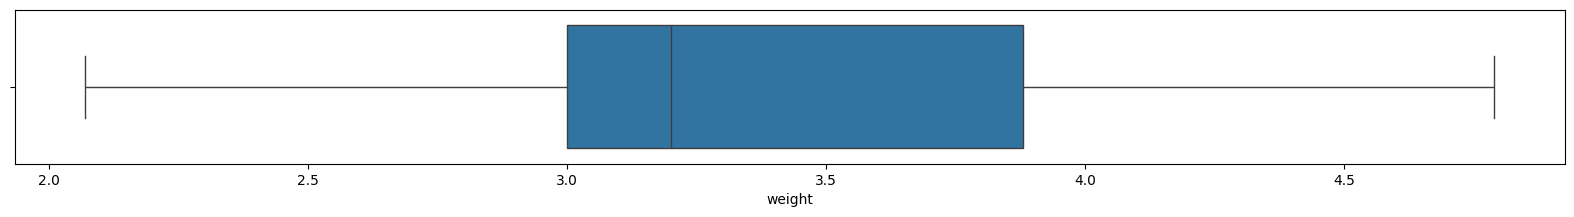

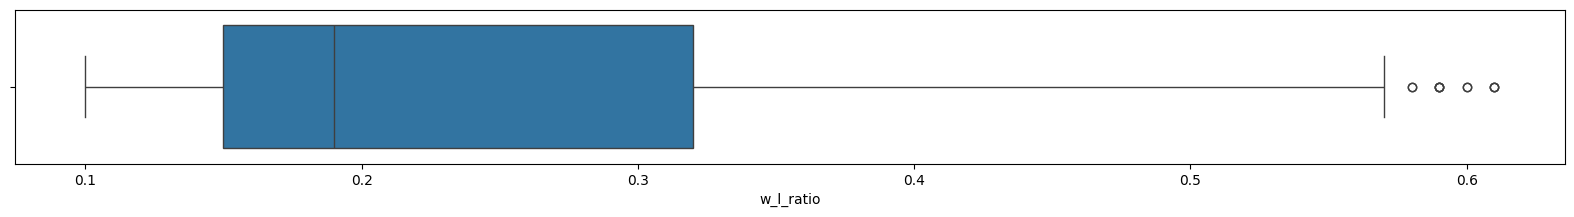

In [33]:
# Mencari Outliers - Boxplot
df_outlier = df_cleaned.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [34]:
Q1 = df_cleaned.select_dtypes(exclude="object").quantile(0.25)
Q3 = df_cleaned.select_dtypes(exclude="object").quantile(0.75)
IQR = Q3-Q1
IQR

length       8.155
weight       0.880
w_l_ratio    0.170
dtype: float64

In [35]:
batas_atas = Q3+(1.5*IQR)
batas_atas

length       31.8925
weight        5.2000
w_l_ratio     0.5750
dtype: float64

In [36]:
df_cleaned = df_cleaned[~((df_cleaned.select_dtypes(exclude="object") < Q1 - 1.5 * IQR)
| (df_cleaned.select_dtypes(exclude="object") > Q3 + 1.5 * IQR)).any(axis=1)]

In [37]:
df_cleaned.shape

(3847, 4)

In [38]:
Q1 = df_cleaned['length'].quantile(0.25)
Q3 = df_cleaned['length'].quantile(0.75)
IQR = Q3-Q1
IQR

7.854999999999999

In [39]:
batas_atas = Q3+(1.5*IQR)
batas_atas

30.987499999999997

In [40]:
jml_outliers = (df_cleaned['length'] > batas_atas).sum()
print(jml_outliers)

107


In [41]:
persentase_outliers = jml_outliers / df_cleaned.shape[0] * 100
print(f"{persentase_outliers:.2f}")

2.78


Outlier sudah berkurang menjadi 2.78% dari dataset

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Assuming the target column is 'Species', let's see the unique classes.
print(df['species'].unique())

[0 1 2 3 4 5 6 7 8]


In [61]:
# Convert categorical target 'Species' into numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [62]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

In [63]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Scaling the features (standardization) for algorithms that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Step 4: Modeling
# Model 1: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [66]:
# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [67]:
# Model 3: K-Nearest Neighbors (K-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [68]:
# Step 5: Evaluation
# Display accuracy for each model
print(f"Accuracy of Logistic Regression: {accuracy_logreg}")
print(f"Accuracy of Random Forest: {accuracy_rf}")
print(f"Accuracy of K-NN: {accuracy_knn}")

Accuracy of Logistic Regression: 0.8872549019607843
Accuracy of Random Forest: 0.9129901960784313
Accuracy of K-NN: 0.9178921568627451
